# Exploratory Analysis Airbnb 2021 - Boston

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline

In [ ]:
pd.set_option('display.max_columns',None)

## Reading files & Preparation
---

In [2]:
listing = pd.read_csv("files/Bostonlistings.csv")
calendar = pd.read_csv("files/Bostoncalendar.csv")
reviews = pd.read_csv("files/Bostonreviews.csv")

### Evaluating Calendar Dataset

In [3]:
calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,45987,2021-04-21,f,$125.00,$125.00,29.0,180.0
1,3781,2021-04-21,f,$125.00,$125.00,32.0,1125.0
2,3781,2021-04-22,f,$125.00,$125.00,32.0,1125.0
3,3781,2021-04-23,f,$125.00,$125.00,32.0,1125.0
4,3781,2021-04-24,f,$125.00,$125.00,32.0,1125.0
5,3781,2021-04-25,f,$125.00,$125.00,32.0,1125.0
6,3781,2021-04-26,f,$125.00,$125.00,32.0,1125.0
7,3781,2021-04-27,f,$125.00,$125.00,32.0,1125.0
8,3781,2021-04-28,f,$125.00,$125.00,32.0,1125.0
9,3781,2021-04-29,f,$125.00,$125.00,32.0,1125.0


In [4]:
calendar.isna().sum()

listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    112
maximum_nights    112
dtype: int64

In [5]:
calendar.available.value_counts()

t    591713
f    555958
Name: available, dtype: int64

Changes:
 * Converts price and adjusted_price from string to float
 * Converts available column to boolean
 * Converts date from string to date

In [6]:
calendar['price'] = calendar['price'].str.replace(pat = '\$|,',repl = '',regex = True).astype(dtype = float)
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(pat = '\$|,',repl = '', regex = True).astype(dtype = float)
calendar['available'] = calendar['available'] == 't'
calendar['date'] = pd.to_datetime(calendar['date'])

### Evaluating Reviews Dataset

In [7]:
reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...
5,3781,63371931,2016-02-22,55456499,John-Mark,Frank was very accommodating throughout my sta...
6,3781,67909504,2016-04-01,55456499,John-Mark,Excellent! This was my second stay at the Jeff...
7,3781,97906006,2016-08-28,88528884,Elisa,Frank was a wonderful and accommodating host. ...
8,3781,105143774,2016-09-30,1342806,Nicole,"Frank was great, the apartment has everything ..."
9,3781,129692749,2017-02-01,55126634,Carlos,Very nice. Comfortable apartment. Good locatio...


In [8]:
reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     1
comments         74
dtype: int64

Changes:
 * Converts date column from string to date

In [9]:
reviews['date'] = pd.to_datetime(reviews['date'])

### Evaluating Listing Dataset

In [10]:
listing.head(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20210420194355,2021-04-21,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.27
1,6695,https://www.airbnb.com/rooms/6695,20210420194355,2021-04-21,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,...,10.0,9.0,10.0,STR-404620,f,4,4,0,0,0.81
2,10813,https://www.airbnb.com/rooms/10813,20210420194355,2021-04-23,"Back Bay Apt-blocks to subway, Newbury St, The...",Stunning Back Bay furnished studio apartment. ...,Wander around this quintessential neighborhood...,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,...,10.0,10.0,10.0,NaN,f,11,11,0,0,0.08
3,10986,https://www.airbnb.com/rooms/10986,20210420194355,2021-04-21,North End (Waterfront area) CLOSE TO MGH & SU...,Chic furnished studio apartment is located on ...,NaN,https://a0.muscache.com/pictures/46994/567b606...,38997,https://www.airbnb.com/users/show/38997,...,NaN,NaN,NaN,NaN,f,11,11,0,0,0.03
4,13247,https://www.airbnb.com/rooms/13247,20210420194355,2021-04-21,Back Bay studio apartment,Beautiful studio apartment in a great Back Bay...,The Back Bay has so many great shops & restaur...,https://a0.muscache.com/pictures/miso/Hosting-...,51637,https://www.airbnb.com/users/show/51637,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
5,16384,https://www.airbnb.com/rooms/16384,20210420194355,2021-04-21,Small Room in Cambridge Kendall MIT,<b>The space</b><br />No Frills Accommodations...,NaN,https://a0.muscache.com/pictures/506512/5d8f63...,23078,https://www.airbnb.com/users/show/23078,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
6,18711,https://www.airbnb.com/rooms/18711,20210420194355,2021-04-21,The Dorset Redline | 3BR 1BA | Short walk to R...,Hospital Grade Sanitation Performed! - Minimu...,"Once its own city, Dorchester is now Boston’s ...",https://a0.muscache.com/pictures/509158a7-36bc...,71783,https://www.airbnb.com/users/show/71783,...,9.0,9.0,9.0,NaN,t,29,16,13,0,0.39
7,22195,https://www.airbnb.com/rooms/22195,20210420194355,2021-04-22,Copley House - Premium Studio,Copley House is comprised of apartments spread...,Back Bay is one of Boston's finest neighborhoo...,https://a0.muscache.com/pictures/2da762e2-3902...,85130,https://www.airbnb.com/users/show/85130,...,9.0,9.0,8.0,Exempt: This listing is a hotel or motel,t,6,1,5,0,0.23
8,22354,https://www.airbnb.com/rooms/22354,20210420194355,2021-04-21,COPLEY SQ...19TH C.TWNHSE SUNNY RM,This room is on the top floor of my home with ...,My house is located 5 minutes away from Boston...,https://a0.muscache.com/pictures/75399104/fbf9...,85770,https://www.airbnb.com/users/show/85770,...,10.0,10.0,9.0,STR-410426,t,4,0,4,0,2.67
9,29765,https://www.airbnb.com/rooms/29765,20210420194355,2021-04-21,"Luxury suite, Moroccan furnishings","<b>The space</b><br />Romantic, comfortable, a...",Boston's oldest and most historic neighborhood...,https://a0.muscache.com/pictures/621420/77d899...,128280,https://www.airbnb.com/users/show/128280,...,10.0,10.0,10.0,STR-383350,f,2,1,1,0,0.70


In [11]:
listing.shape

(3146, 74)

In [12]:
Missing_values = pd.DataFrame(listing.isna().sum()[listing.isna().sum().values > 0], columns=['Missing_Count'])
Missing_values.sort_values(by = 'Missing_Count', ascending=False)

,Missing_Count
calendar_updated,3146
bathrooms,3146
neighbourhood_group_cleansed,3146
license,1552
host_about,1145
neighborhood_overview,1014
neighbourhood,1014
review_scores_checkin,1000
review_scores_accuracy,999
review_scores_location,999


Changes:

* Drop column with na in all lines
* Converts *last_scraped*, *host_since*, *calendar_last_scraped*, *first_review* and *last_review* from string to date
* Converts *price*, *host_response_rate* and *host_acceptance_rate* from string to float
* Converts *host_is_superhost*, *host_has_profile_pic*, *host_identity_verified*, *has_availability* and *instant_bookable* to boolean

In [13]:
listing = listing.dropna(axis=1, how='all')

listing['last_scraped'] = pd.to_datetime(listing['last_scraped'])
listing['host_since'] = pd.to_datetime(listing['host_since'])
listing['calendar_last_scraped'] = pd.to_datetime(listing['calendar_last_scraped'])
listing['first_review'] = pd.to_datetime(listing['first_review'])
listing['last_review'] = pd.to_datetime(listing['last_review'])
listing['price'] = listing['price'].str.replace(pat = '\$|,',repl='',regex = True).astype(dtype = float)
listing['host_response_rate'] = listing['host_response_rate'].str.strip('%').astype(dtype = float)*(0.01)
listing['host_acceptance_rate'] = listing['host_acceptance_rate'].str.strip('%').astype(dtype = float)*(0.01)


In [14]:
for col in listing[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']].columns:
    i = []
    for value in listing[col]:
        if value == 't':
            i.append(True)
        elif value == 'f':
            i.append(False)
        else: i.append(value)
    listing[col] = i

## Exploratory Analysis
---

### Host Analysis

    Count listing per host and Superhost:

In [15]:
host_listing = listing.groupby('host_id').agg({'host_total_listings_count': 'mean', 'host_is_superhost': 'first', 'id':'count'})
host_listing.rename(mapper = {'id': 'count_Listings_Boston'}, axis = 1, inplace= True)

In [16]:
host_listing.groupby('host_is_superhost', dropna= False).agg({'host_total_listings_count': ["mean", np.sum, 'count'], 
                                                              'count_Listings_Boston': ["mean", np.sum, 'count']})

host_total_listings_count                 \
                                       mean      sum count   
host_is_superhost                                            
False                             12.756824  10282.0   806   
True                               2.633423    977.0   371   
NaN                                     NaN      0.0     0   

                  count_Listings_Boston              
                                   mean   sum count  
host_is_superhost                                    
False                          2.870968  2314   806  
True                           2.032345   754   371  
NaN                            2.294118    78    34

In [17]:
host_listing.sort_values('count_Listings_Boston', ascending=False)

,host_total_listings_count,host_is_superhost,count_Listings_Boston
host_id,,,
359229620,1185.0,False,152
107434423,1486.0,False,129
814298,95.0,False,96
22348222,100.0,False,55
297860058,1.0,False,51
...,...,...,...
27569517,1.0,False,1
27630785,1.0,True,1
27756951,1.0,False,1


In [18]:
host_listing['host_is_superhost'].value_counts()/host_listing.shape[0]

False    0.665566
True     0.306358
Name: host_is_superhost, dtype: float64

In [19]:
host_listing.sort_values('count_Listings_Boston', ascending=False).head(15)

,host_total_listings_count,host_is_superhost,count_Listings_Boston
host_id,,,
359229620,1185.0,False,152
107434423,1486.0,False,129
814298,95.0,False,96
22348222,100.0,False,55
297860058,1.0,False,51
368944610,2232.0,False,50
9419684,424.0,False,45
212359760,47.0,False,37
30283594,451.0,False,34


[Text(0.5, 0, 'Qty listings'), Text(0, 0.5, 'Is SuperHost')]

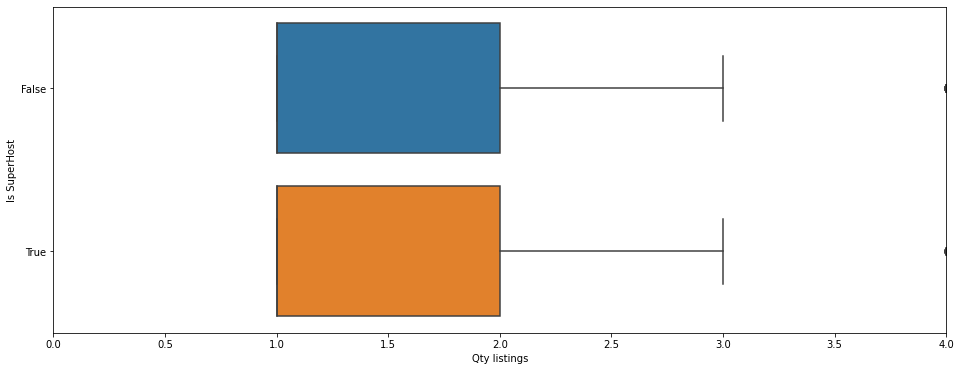

In [20]:
plt.figure(figsize=(16,6))
plt.xlim(right = 4)
sns.boxplot(data = host_listing, 
            x = 'count_Listings_Boston', 
            y = 'host_is_superhost').set(xlabel='Qty listings', 
                                         ylabel='Is SuperHost')

For both categories the median was on 1.

<AxesSubplot:xlabel='Qty listings', ylabel='Qty host'>

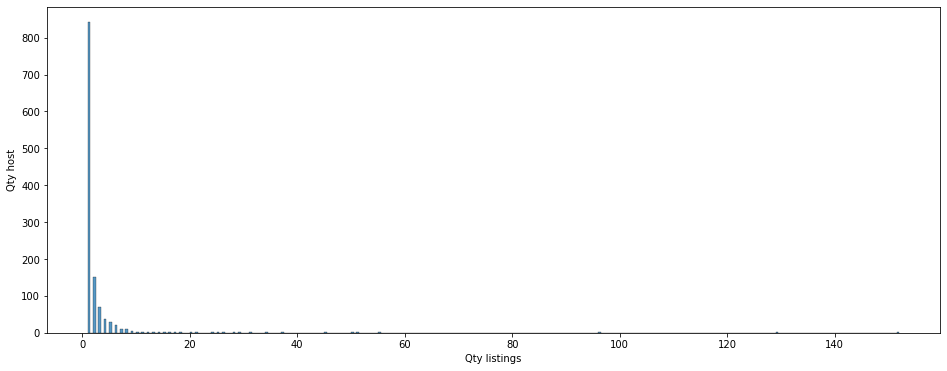

In [44]:
plt.figure(figsize=(16,6))
plt.ylabel('Qty host')
plt.xlabel('Qty listings')
sns.histplot(listing.groupby('host_id', dropna = False)['id'].count(), bins = 302)

<AxesSubplot:xlabel='Qty listings', ylabel='Qty host'>

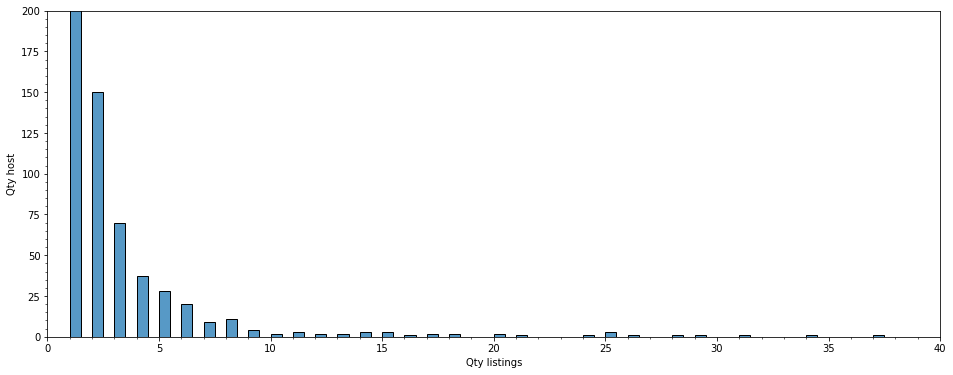

In [45]:
plt.figure(figsize=(16,6))
plt.ylim(0,200)
plt.xlim(0,40)
plt.minorticks_on()
plt.ylabel('Qty host')
plt.xlabel('Qty listings')
sns.histplot(listing.groupby('host_id', dropna = False)['id'].count(), bins = 302)

> #### How quick communication can impact on your booking

In [23]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,45987,2021-04-21,False,125.0,125.0,29.0,180.0
1,3781,2021-04-21,False,125.0,125.0,32.0,1125.0
2,3781,2021-04-22,False,125.0,125.0,32.0,1125.0
3,3781,2021-04-23,False,125.0,125.0,32.0,1125.0
4,3781,2021-04-24,False,125.0,125.0,32.0,1125.0


In [48]:
aggregated_list = calendar[calendar['available'] != True].groupby('listing_id').agg({'adjusted_price' : ['mean', np.sum], 
                                                                                     'price' : ['mean', np.sum], 
                                                                                     'available':'count'})
aggregated_list.columns = [col2 + '_' + col1 for col1, col2 in aggregated_list.columns]
aggregated_list.rename(columns = {"count_available": "days_booked"}, inplace= True)

In [55]:
aggregated_list.sort_values('days_booked', ascending= False).head(10)

,mean_adjusted_price,sum_adjusted_price,mean_price,sum_price,days_booked
listing_id,,,,,
6716872,200.000000,73200.0,200.000000,73200.0,366
24940427,249.000000,91134.0,249.000000,91134.0,366
13530359,42.000000,15372.0,42.000000,15372.0,366
12254831,55.000000,20130.0,55.000000,20130.0,366
39004794,207.193989,75833.0,207.193989,75833.0,366
8390793,57.103825,20900.0,57.103825,20900.0,366
5856633,350.000000,128100.0,350.000000,128100.0,366
29010062,37.000000,13505.0,37.000000,13505.0,365
28992318,50.000000,18250.0,50.000000,18250.0,365


In [26]:
right_listing =  listing[['id', 
                          'host_id', 
                          'host_since', 
                          'host_response_time', 
                          'host_response_rate', 
                          'host_acceptance_rate', 
                          'host_is_superhost', 
                          'host_verifications', 
                          'host_has_profile_pic', 
                          'host_identity_verified']]
host_analysis =  aggregated_list.merge(right = right_listing, how = 'inner', left_index= True, right_on = 'id').sort_values('sum_adjusted_price', ascending=False)

In [27]:
host_analysis.shape

(2900, 15)

In [28]:
host_analysis['host_is_superhost'].value_counts()/host_analysis.shape[0]

False    0.720345
True     0.254138
Name: host_is_superhost, dtype: float64

In [29]:
host_analysis.head(15)

,mean_adjusted_price,sum_adjusted_price,mean_price,sum_price,days_booked,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified
1962,10000.000000,3650000.0,10000.000000,3650000.0,365,39772945,305274008,2019-10-29,within a few hours,0.96,0.79,False,"['email', 'phone']",True,True
1961,10000.000000,3650000.0,10000.000000,3650000.0,365,39772695,305274008,2019-10-29,within a few hours,0.96,0.79,False,"['email', 'phone']",True,True
786,4907.183673,1442712.0,4907.183673,1442712.0,294,17138041,10850877,2013-12-27,NaN,NaN,NaN,False,"['email', 'phone', 'reviews', 'kba']",True,True
409,5000.000000,1305000.0,5000.000000,1305000.0,261,8116523,42431392,2015-08-24,within an hour,1.00,0.99,False,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True
1619,9910.621622,1100079.0,9910.621622,1100079.0,111,33351519,261039449,2019-05-10,within an hour,0.89,1.00,False,"['email', 'phone']",True,True
1618,9910.441441,1100059.0,9910.441441,1100059.0,111,33351516,261039449,2019-05-10,within an hour,0.89,1.00,False,"['email', 'phone']",True,True
1617,9910.351351,1100049.0,9910.351351,1100049.0,111,33351298,261039449,2019-05-10,within an hour,0.89,1.00,False,"['email', 'phone']",True,True
3130,5000.000000,685000.0,5000.000000,685000.0,137,49244928,319015619,2019-12-19,within an hour,1.00,0.99,False,"['email', 'phone', 'offline_government_id', 's...",True,True
2584,1872.877358,595575.0,1872.877358,595575.0,318,46262662,118162851,2017-02-26,within an hour,1.00,1.00,True,"['email', 'phone', 'offline_government_id', 's...",True,True
2843,1700.000000,535500.0,1700.000000,535500.0,315,48045698,60638551,2016-02-27,NaN,NaN,NaN,False,"['email', 'phone', 'reviews', 'offline_governm...",True,True


In [30]:
host_analysis =  host_analysis.groupby('host_id').agg({'mean_adjusted_price' : 'mean', 
                                                       'sum_adjusted_price': 'mean', 
                                                       'mean_price': 'mean', 
                                                       'sum_price': 'mean', 
                                                       'days_booked':'mean', 
                                                       'host_since': 'first', 
                                                       'host_response_time': 'first', 
                                                       'host_response_rate': 'first', 
                                                       'host_acceptance_rate': 'first', 
                                                       'host_is_superhost': 'first', 
                                                       'host_verifications': 'first', 
                                                       'host_has_profile_pic' : 'first', 
                                                       'host_identity_verified': 'first',
                                                       'id': 'count'})


In [31]:
host_analysis['host_response_time'].value_counts()

within an hour        438
within a few hours    116
within a day          102
a few days or more     21
Name: host_response_time, dtype: int64

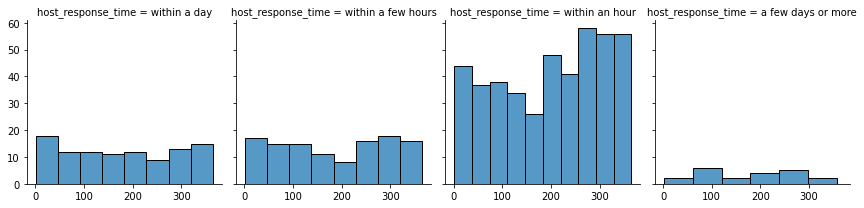

In [32]:
g = sns.FacetGrid(host_analysis, col="host_response_time")
g.map_dataframe(sns.histplot, x="days_booked")

> #### Compare what is more profitable

<AxesSubplot:xlabel='days_booked', ylabel='host_is_superhost'>

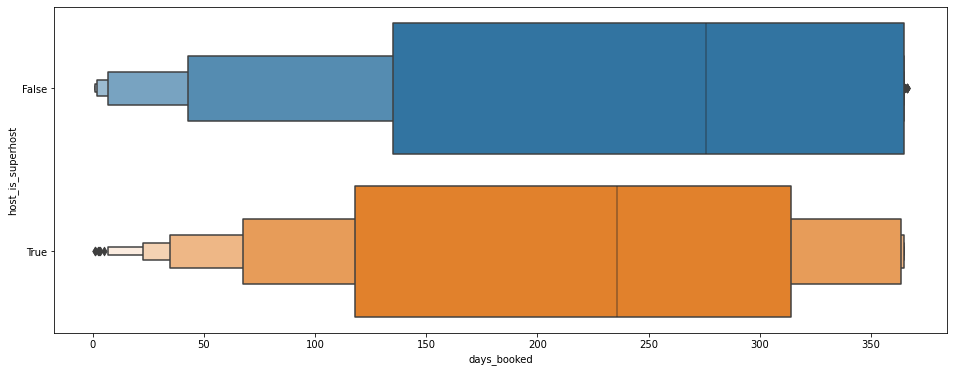

In [33]:
plt.figure(figsize=(16,6))
sns.boxenplot(data = host_analysis, x = 'days_booked', y = 'host_is_superhost')

<AxesSubplot:xlabel='sum_adjusted_price', ylabel='host_is_superhost'>

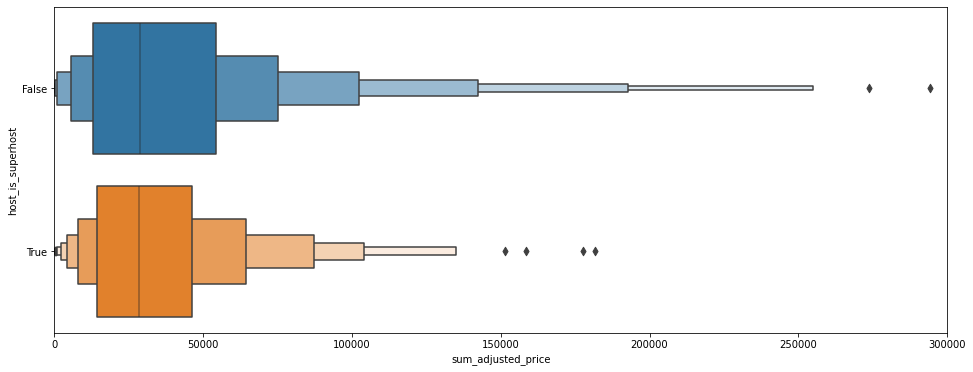

In [34]:
plt.figure(figsize=(16,6))
plt.xlim(right = 300000)
sns.boxenplot(data = host_analysis, x = 'sum_adjusted_price', y = 'host_is_superhost')

Besides the median between Super Host and Host is the same, some of the not Super Host are able to out performance the Super Host considering the boxens.

In [35]:
host_analysis.sort_values('sum_adjusted_price', ascending=False).head(10)

,mean_adjusted_price,sum_adjusted_price,mean_price,sum_price,days_booked,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,id
host_id,,,,,,,,,,,,,,
305274008,10000.000000,3.650000e+06,10000.000000,3.650000e+06,365.000000,2019-10-29,within a few hours,0.96,0.79,False,"['email', 'phone']",True,True,2
10850877,4907.183673,1.442712e+06,4907.183673,1.442712e+06,294.000000,2013-12-27,None,NaN,NaN,False,"['email', 'phone', 'reviews', 'kba']",True,True,1
261039449,5444.163585,6.052730e+05,5444.163585,6.052730e+05,112.000000,2019-05-10,within an hour,0.89,1.00,False,"['email', 'phone']",True,True,6
60638551,1700.000000,5.355000e+05,1700.000000,5.355000e+05,315.000000,2016-02-27,None,NaN,NaN,False,"['email', 'phone', 'reviews', 'offline_governm...",True,True,1
118162851,1426.358969,4.668100e+05,1426.358969,4.668100e+05,331.500000,2017-02-26,within an hour,1.00,1.00,True,"['email', 'phone', 'offline_government_id', 's...",True,True,2
27172259,1003.328767,3.662150e+05,1051.986301,3.839750e+05,365.000000,2015-02-03,None,NaN,NaN,True,"['email', 'phone', 'facebook', 'reviews', 'jum...",True,True,1
81492503,1066.666667,2.944000e+05,1066.666667,2.944000e+05,276.000000,2016-07-03,None,NaN,NaN,False,"['email', 'phone', 'reviews']",True,False,3
36496544,750.000000,2.737500e+05,750.000000,2.737500e+05,365.000000,2015-06-23,None,NaN,NaN,False,"['phone', 'facebook']",True,False,1
187675813,692.892857,2.522130e+05,692.892857,2.522130e+05,364.000000,2018-05-03,within a day,1.00,0.77,False,"['email', 'phone']",True,False,1


### Listing Analysis

In [36]:
right_listing = listing[['id','property_type', 
                         'room_type', 'accommodates',
                         'bathrooms_text', 'bedrooms',
                         'beds', 'amenities',
                         'price', 'number_of_reviews',
                         'review_scores_rating', 'review_scores_accuracy',
                         'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location',
                         'review_scores_value', 'license', 'instant_bookable']]
listing_analysis =  aggregated_list.merge(right = right_listing, how = 'inner', left_index= True, right_on = 'id').sort_values('sum_adjusted_price', ascending=False)

In [37]:
listing_analysis.head(15)

,mean_adjusted_price,sum_adjusted_price,mean_price,sum_price,days_booked,id,property_type,room_type,accommodates,bathrooms_text,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable
1962,10000.000000,3650000.0,10000.000000,3650000.0,365,39772945,Room in boutique hotel,Private room,3,1 shared bath,...,9,80.0,10.0,9.0,10.0,10.0,10.0,9.0,STR-383164,True
1961,10000.000000,3650000.0,10000.000000,3650000.0,365,39772695,Room in boutique hotel,Private room,2,1 shared bath,...,12,80.0,8.0,8.0,9.0,9.0,9.0,8.0,STR-383164,True
786,4907.183673,1442712.0,4907.183673,1442712.0,294,17138041,Entire apartment,Entire home/apt,6,1 bath,...,164,93.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,True
409,5000.000000,1305000.0,5000.000000,1305000.0,261,8116523,Entire townhouse,Entire home/apt,3,1 bath,...,181,92.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,True
1619,9910.621622,1100079.0,9910.621622,1100079.0,111,33351519,Room in hotel,Hotel room,2,1 bath,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exempt: This listing is a hotel or motel,True
1618,9910.441441,1100059.0,9910.441441,1100059.0,111,33351516,Room in hotel,Hotel room,4,1 bath,...,1,40.0,4.0,4.0,2.0,2.0,4.0,4.0,Exempt: This listing is a hotel or motel,True
1617,9910.351351,1100049.0,9910.351351,1100049.0,111,33351298,Room in hotel,Hotel room,2,1 bath,...,19,96.0,10.0,10.0,10.0,10.0,10.0,9.0,Exempt: This listing is a hotel or motel,True
3130,5000.000000,685000.0,5000.000000,685000.0,137,49244928,Entire house,Entire home/apt,14,3 baths,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2584,1872.877358,595575.0,1872.877358,595575.0,318,46262662,Entire apartment,Entire home/apt,4,2 baths,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-438570,True
2843,1700.000000,535500.0,1700.000000,535500.0,315,48045698,Private room in condominium,Private room,1,1 private bath,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


## 

In [38]:
listing_analysis['review_scores_value'].value_counts()

10.0    953
9.0     814
8.0     145
7.0      36
6.0      23
5.0       6
2.0       5
4.0       4
3.0       2
Name: review_scores_value, dtype: int64

<AxesSubplot:xlabel='review_scores_rating', ylabel='days_booked'>

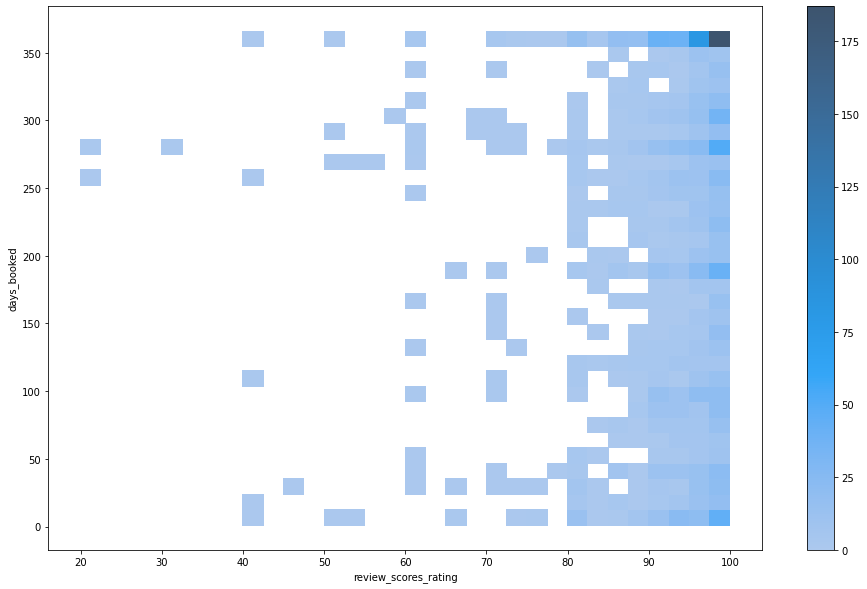

In [39]:
plt.figure(figsize=(16,10))
sns.histplot(data = listing_analysis, x = 'review_scores_rating', y = 'days_booked',
             bins=32, cbar=True)